In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv("C:\\Users\\littl\\Documents\\Coding\\Self Taught\\Python\\dataset\\spam.csv", encoding='latin-1')[['v1','v2']]
df.columns = ['label', 'text']

In [8]:
print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [10]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


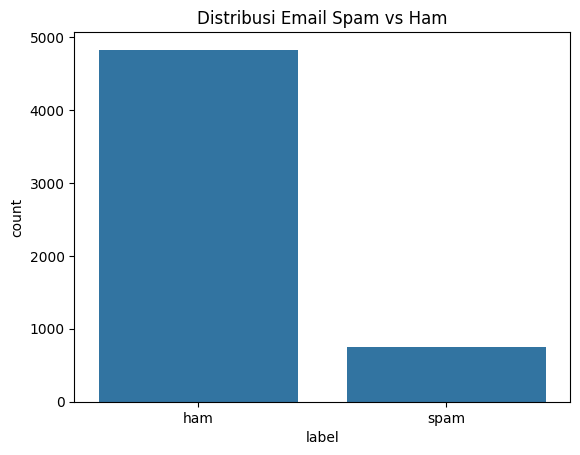

In [11]:
sns.countplot(x=df['label'])
plt.title("Distribusi Email Spam vs Ham")
plt.show()

In [12]:
df['label'] = df['label'].map({'ham': 0, 'spam' : 1})

In [13]:
def clean_text(text):
    text = text.lower()  # Ubah menjadi huruf kecil
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = text.strip()  # Hapus spasi awal dan akhir
    return text

In [14]:
df['clean_text'] = df['text'].apply(clean_text)

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Akurasi Model: {accuracy:.2f}")

📊 Akurasi Model: 0.97


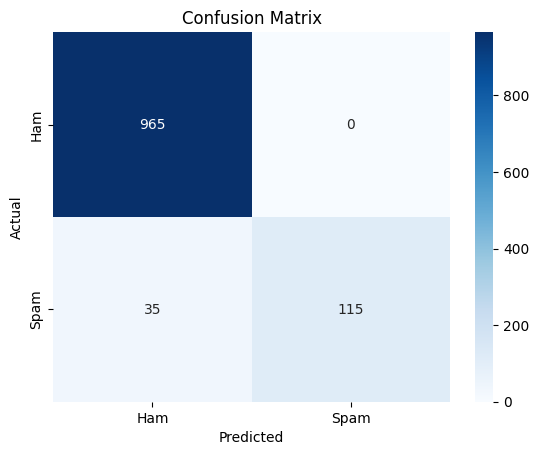

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
def predict_email(text):
    text_clean = clean_text(text)
    text_vector = vectorizer.transform([text_clean])
    prediction = model.predict(text_vector)
    return "Spam" if prediction == 1 else "Ham"

In [23]:
email1 = "Congratulations! You won a lottery of $1,000,000. Claim now!"
email2 = "Hey John, can we meet for lunch tomorrow?"

In [24]:
print(f"Email 1: {predict_email(email1)}")  # Expected: Spam
print(f"Email 2: {predict_email(email2)}")  # Expected: Ham

Email 1: Spam
Email 2: Ham
